<a href="https://colab.research.google.com/github/nupursjsu/Deep-Learning/blob/master/Ungraded_Assignment3/ImageClassification_using_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image classification using Deep neural network

We are using cat/no cat dataset used previously.

## Importing necessary libraries

In [60]:
# Importing libraries required
import time
import numpy as np
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

#Setting default values for plots
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

#setting random seed for consistency
np.random.seed(12)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the cat/nocat train and test datasets and dnn_app_utils_v3 package

In [0]:
# Code to read data file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [62]:
#Getting train datset
link = 'https://drive.google.com/open?id=19gY-R95mw4WDcZ-v1pU9j__Nk-S5nz_Y'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_catvnoncat.h5')

19gY-R95mw4WDcZ-v1pU9j__Nk-S5nz_Y


In [63]:
#Getting test datset
link = 'https://drive.google.com/open?id=1HRwtrqvstIqIgBMGgt6T43ddTGZss6YI'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_catvnoncat.h5')

1HRwtrqvstIqIgBMGgt6T43ddTGZss6YI


In [0]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
#Loading the cat/nocat train and test dataset and their classes
train_img_x, train_img_y, test_img_x, test_img_y, classes = load_dataset()

label = [1], it's a 'cat' picture.


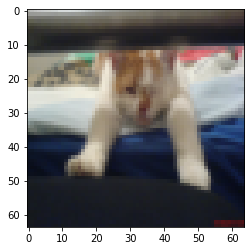

In [66]:
# Displaying a picture from dataset
idx = 29
plt.imshow(train_img_x[idx])
print ("label = " + str(train_img_y[:, idx]) + ", it's a '" + classes[np.squeeze(train_img_y[:, idx])].decode("utf-8") +  "' picture.")

In [67]:
#Getting dnn_app_utils_v3 package
link = 'https://drive.google.com/open?id=1a1rHjGFFNdZnDP0lCL2wi7W9-a5LnPxh'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('dnn_app_utils_v3.py')

1a1rHjGFFNdZnDP0lCL2wi7W9-a5LnPxh


In [0]:
from dnn_app_utils_v3 import *

In [69]:
#Displaying the number of training examples in train and test dataset and the shape of datasets
train = train_img_x.shape[0]
test = test_img_x.shape[0]
num_px = train_img_x.shape[2]


print ("Number of training examples: train = " + str(train))
print ("Number of testing examples: test = " + str(test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_img_x shape: " + str(train_img_x.shape))
print ("train_img_y shape: " + str(train_img_y.shape))
print ("test_img_x shape: " + str(test_img_x.shape))
print ("test_img_y shape: " + str(test_img_y.shape))

Number of training examples: train = 209
Number of testing examples: test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_img_x shape: (209, 64, 64, 3)
train_img_y shape: (1, 209)
test_img_x shape: (50, 64, 64, 3)
test_img_y shape: (1, 50)


## Preprocessing data

In [70]:
# Reshape the training and test images
train_img_x_flatten = train_img_x.reshape(train_img_x.shape[0], -1).T
test_img_x_flatten = test_img_x.reshape(test_img_x.shape[0], -1).T

print ("train_img_x_flatten shape: " + str(train_img_x_flatten.shape))
print ("train_img_y shape: " + str(train_img_y.shape))
print ("test_img_x_flatten shape: " + str(test_img_x_flatten.shape))
print ("test_img_y shape: " + str(test_img_y.shape))
print ("sanity check after reshaping: " + str(train_img_x_flatten[0:5,0]))

train_img_x_flatten shape: (12288, 209)
train_img_y shape: (1, 209)
test_img_x_flatten shape: (12288, 50)
test_img_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [0]:
#Normalizing the image data
train_img_x = train_img_x_flatten/255.
test_img_x = test_img_x_flatten/255.

## Building a 2-layer neural network model

In [0]:
#Defining constants for the model
x = 12288 
h = 7
y = 1
layers_dims = (x, h, y)

In [0]:
#Implementing a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=2500, print_cost=False):
    np.random.seed(1)
    gradients = {}
    losses= []                              
    r = X.shape[1]                           
    (x, h, y) = layers_dims
    
    # Initialize parameters using previously imlemented function 
    params = initialize_parameters(x, h, y)
    
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    # Loop through gradient descent

    for i in range(0, num_iterations):

        # Initializing Forward propagation
        A1, op1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, op2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        # Computing loss
        loss = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        #Backward propagation
        dA1, dW2, db2 = linear_activation_backward(dA2, op2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, op1, 'relu')

        
        #Setting gradients params
        gradients['dW1'] = dW1
        gradients['db1'] = db1
        gradients['dW2'] = dW2
        gradients['db2'] = db2
        
        #Updating parameters.
        params = update_parameters(params, gradients, learning_rate)
      

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = params["W1"]
        b1 = params["b1"]
        W2 = params["W2"]
        b2 = params["b2"]
        
        #Printing the loss after every 100 training examples
        if print_cost and i % 100 == 0:
            print("Loss after iteration {}: {}".format(i, np.squeeze(loss)))
        if print_cost and i % 100 == 0:
            losses.append(loss)
       
    #ploting the loss
    plt.plot(np.squeeze(losses))
    plt.ylabel('loss')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return params

Loss after iteration 0: 0.693049735659989
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912678
Loss after iteration 300: 0.6015024920354665
Loss after iteration 400: 0.5601966311605748
Loss after iteration 500: 0.5158304772764731
Loss after iteration 600: 0.47549013139433255
Loss after iteration 700: 0.43391631512257495
Loss after iteration 800: 0.4007977536203886
Loss after iteration 900: 0.35807050113237976
Loss after iteration 1000: 0.3394281538366413
Loss after iteration 1100: 0.30527536361962654
Loss after iteration 1200: 0.2749137728213016
Loss after iteration 1300: 0.2468176821061484
Loss after iteration 1400: 0.19850735037466105
Loss after iteration 1500: 0.17448318112556638
Loss after iteration 1600: 0.17080762978096967
Loss after iteration 1700: 0.11306524562164705
Loss after iteration 1800: 0.09629426845937154
Loss after iteration 1900: 0.08342617959726867
Loss after iteration 2000: 0.07439078704319087
Loss after iteration 2100: 0.0663074

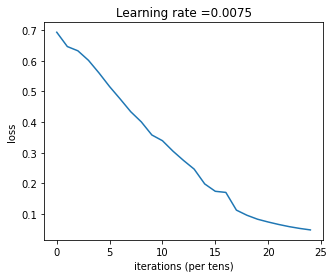

In [74]:
params = two_layer_model(train_img_x, train_img_y, layers_dims = (x, h, y), num_iterations = 2500, print_cost=True)

## Evaluating train and test accuracies of 2- layer NN model

In [75]:
pred_train = predict(train_img_x, train_img_y, params)

Accuracy: 0.9999999999999998


In [76]:
pred_test = predict(test_img_x, test_img_y, params)

Accuracy: 0.72


## Building a L-layer neural network model

In [0]:
#Defining constants of 5 layer NN model
layers_dims = [12288, 20, 7, 5, 1]

In [0]:
#Implementing a five-layer neural network model
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=2500, print_cost=False): 
  np.random.seed(1)
  losses = [] 
  # Initialize parameters using previously imlemented function 
  params = initialize_parameters_deep(layers_dims)

  # Loop through gradient descent
  for i in range(0, num_iterations):
    AL, ops = L_model_forward(X, params) #Forward propogation
    #Computing loss
    loss = compute_cost(AL, Y)
    #Backward propagation
    gradients = L_model_backward(AL, Y, ops)
    #Updating parameters using gradient descent
    params = update_parameters(params, gradients, learning_rate)
    if print_cost and i % 100 == 0:
      print ("Loss after iteration %i: %f" % (i, loss))
      losses.append(loss)

  #plotting the loss
  plt.plot(np.squeeze(losses))
  plt.ylabel('loss')
  plt.xlabel('iterations (per tens)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
    
  return params


Loss after iteration 0: 0.771749
Loss after iteration 100: 0.672053
Loss after iteration 200: 0.648263
Loss after iteration 300: 0.611507
Loss after iteration 400: 0.567047
Loss after iteration 500: 0.540138
Loss after iteration 600: 0.527930
Loss after iteration 700: 0.465477
Loss after iteration 800: 0.369126
Loss after iteration 900: 0.391747
Loss after iteration 1000: 0.315187
Loss after iteration 1100: 0.272700
Loss after iteration 1200: 0.237419
Loss after iteration 1300: 0.199601
Loss after iteration 1400: 0.189263
Loss after iteration 1500: 0.161189
Loss after iteration 1600: 0.148214
Loss after iteration 1700: 0.137775
Loss after iteration 1800: 0.129740
Loss after iteration 1900: 0.121225
Loss after iteration 2000: 0.113821
Loss after iteration 2100: 0.107839
Loss after iteration 2200: 0.102855
Loss after iteration 2300: 0.100897
Loss after iteration 2400: 0.092878


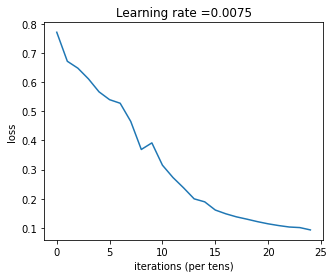

In [88]:
params = L_layer_model(train_img_x, train_img_y, layers_dims, num_iterations=2500, print_cost=True)

## Evaluating train and test accuracies of L- layer NN model

In [89]:
pred_train = predict(train_img_x, train_img_y, params)

Accuracy: 0.9856459330143539


In [90]:
pred_test = predict(test_img_x, test_img_y, params)

Accuracy: 0.8


## Analyzing results

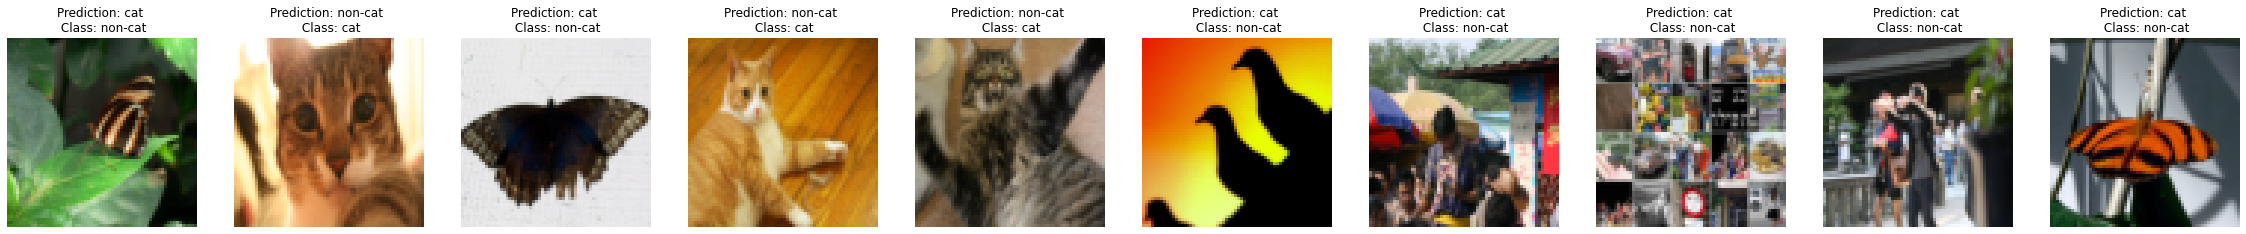

In [91]:
#Displaying top 10 incorrect predictions made by L-layer NN model
print_mislabeled_images(classes, test_img_x, test_img_y, pred_test)